Juan Camilo Echeverri Gutierréz <br>
jecheverrigutierrez@gmail.com <br>
https://www.linkedin.com/in/juan-echeverri-70bb88b1/ <br>

_"if you want to be an anomaly, you have to act like one"_ Gary Vaynerchuk

# Analisis de sentimientos en Twitter

Los algoritmos de **_clasifición de texto_** tienen una amplia aplicacion en el sector industrial, que va desde filtar spams hasta analizar sentimientos.

![spams](IMAGENES/Selección_822.png)

El objetivo de la clasificacion de sentimientos es identificar la polaridad del contenido de un texto. Este problema se puede abordar con un clasificador binario (positivo o negativo) o con una calificacion en los reales (positiva, negativa o neutra).
Las aplicaciones del analisis de sentimientos son inmensas, por ejemplo: reputacion de una marca o empresa, favoritismo de politicos, opinion sobre una pelicula o producto, entre otros.

## Los pasos para abordar este tipo de problemas son:
![pasos](IMAGENES/Selección_823.png)

### Recopilar los datos
Debido a que nos interesa hacer clasificacion de sentimientos en Twitter, debemos buscar:
>  1\. Una alternativa para obtener Tweets, en este caso usaremos la API de Twiiter para Python: Tweepy. En otros casos en los que se disponga de una API tendremos que hacer un poco de scrapping.<br>
>  2\. Una base de datos de entrenamiento y prueba correctamente etiquetada.

### Usemos la API de Twitter

Twitter ofrece tres APIs: Streaming API,  REST API y  Search API aplicables a necesidades diferentes. En este ejercicio vamos a usar la Search API, la cual suministra los tweets con una profundidad en el tiempo de 7 días que se ajustan al query solicitado. Es posible filtrar por, usuario, idioma y localización.

![API](IMAGENES/Selección_834.png)
Tomada de Mastering social media mining with python de Marco Bonzanini


In [2]:
import tweepy

#consumer_key=<>
#consumer_secret=<>

#access_token=<>
#access_token_secret=<>

![configuracionAPI](IMAGENES/Selección_825.png)

In [8]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api=tweepy.API(auth,wait_on_rate_limit=True)

query = 'Federer'

max_tweets = 20

tweets=[]
for tweet_info in tweepy.Cursor(api.search, q=query, lang = 'en', tweet_mode='extended').items(max_tweets):
    if 'retweeted_status' in dir(tweet_info):
        tweet=tweet_info.retweeted_status.full_text
        tweets.append(tweet)
    else:
        tweet=tweet_info.full_text
        tweets.append(tweet)


In [9]:
for tw in tweets[:5]:
    print("--------------------")
    print(tw)
    print("--------------------\n")

--------------------
Joselo is the new Linero? 😐 https://t.co/b6Ceoyh9mg
--------------------

--------------------
Joselo is the new Linero? 😐 https://t.co/b6Ceoyh9mg
--------------------

--------------------
SEO E INBOUND MARKETING [ Palabras clave + Herramientas]
https://t.co/BwHIcAIRCp
--------------------

--------------------
When Calle 13 said: "Por ti dejo el celibato y me quito e´cura" i really felt that shit. 

Att: El Padre Linero.
--------------------

--------------------
@PLinero Read: https://t.co/jxoEOWCEhA  A Usted Padre Linero
--------------------



### Base de datos de entrenamiento y prueba

En ML nuestros modelos son tan buenos como lo que le entramos para entrenarlos, si entra basura, entonces, saldra basura.

Tambien es importante la cantidad de ejemplos de nuestra base de datos, mientras mas ejemplos tenemos mas posibilidades de **generalizar**.

Debemos buscar una **base de datos balanceada** o de los contrario nuestro modelos podrian tener sesgos hacia una clase determinada.

![sesgos1](IMAGENES/Selección_828.png)

![sesgos2](IMAGENES/Selección_829.png)

#[sesgos2](IMAGENES/Selección_830.png)


## Cómo seleccionar un modelo de ML para clasificación de texto - Google
__[Enlace Google developer](https://developers.google.com/machine-learning/guides/text-classification/step-2-5)__

![pasos](IMAGENES/TextClassificationFlowchart.png)

## Modelo Bag of Word

El modelo bag of words es una representación de un documento sin orden, solo importa el conteo de las palabras. Como alternativa a este inconveniente del BoW se pueden usar los N gramas, sin embargo, en problemas de clasificación de texto el modelo BoW obtiene resultados aceptables.



![BoW](IMAGENES/Selección_838.png)

## Notas del BoW

> * Es una forma común de representar documentos en forma de matriz.
> * Construye una matriz de N x T
> * Cada columna representa un término único, y cada celda i, j representa cuántos del término j están en el documento i.
> * El orden de las palabras dentro de un documento no se toma en cuenta en el modelo
> * Una vez que tenemos nuestra matriz de término de documento, podemos usar técnicas de ML
> * Es un bloque fundamental para muchas técnicas más avanzadas.
> * Lo que estamos haciendo es extraer información potencialmente relevante de una manera que la computadora puede utilizar (es decir, números)
> * Es buena practica minimizar la distancia entre dos vectores de características similares
> * Se debe procurar no perder mucha informacion, por ejemplo cuando se convierten a minusculas nombre propios Apple y apple o cuando se lematiza

### Exploremos la base de datos Sentimient140 de la universidad Stanford

__[Enlace de descarga de la base de datos de entrenamiento y prueba](http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip)__
    
__[Paper en el que se explica como fue construida la base de datos](https://cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf)__

A continuacion vamos a explorar la base de datos

![sesgos2](IMAGENES/Selección_831.png)


In [2]:
import pandas as pd  

colums = ['SENTIMIENTO','ID','FECHA','QUERY','USUARIO','TEXTO']
df = pd.read_csv("stanford_emotion_dataset/training.1600000.processed.noemoticon.csv",
                 header=None, names=colums,encoding = "ISO-8859-1")
#tambien se pudo haber usado el alias de ISO-8859-1, latin1
df.head()

,SENTIMIENTO,ID,FECHA,QUERY,USUARIO,TEXTO
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Vamos a hacer una revision superficial de nuestra base de datos:

In [3]:
df[df["SENTIMIENTO"]==4].head()

,SENTIMIENTO,ID,FECHA,QUERY,USUARIO,TEXTO
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [4]:
print(df[df["SENTIMIENTO"]==4].TEXTO.iloc[1])
print(len(df[df["SENTIMIENTO"]==4].TEXTO.iloc[1]))

im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!
72


In [5]:
print(df[df["SENTIMIENTO"]==0].TEXTO.iloc[1])
print(len(df[df["SENTIMIENTO"]==0].TEXTO.iloc[1]))

is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
111


### Retiremos la informacion innecesaria para nuestro problema

In [6]:
df.drop(['ID','FECHA','QUERY','USUARIO'],axis=1,inplace=True)
print(len(df))
df.head()

1600000


,SENTIMIENTO,TEXTO
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [7]:
df.dropna(inplace=True)
print(len(df))

1600000


### Vamos a revisar si la base de datos esta balanceada

In [8]:
df['SENTIMIENTO'].value_counts()

4    800000
0    800000
Name: SENTIMIENTO, dtype: int64

In [9]:
longitudtweets=[len(i) for i in df["TEXTO"]]
len(longitudtweets)

1600000

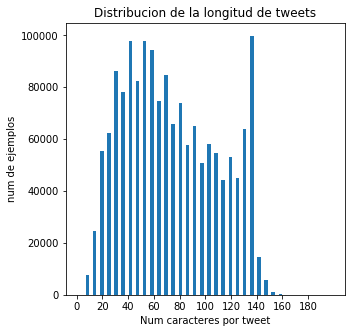

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 5))
plt.hist(longitudtweets,36,rwidth=.5,range=(0, 200 ))

plt.xlabel('Num caracteres por tweet')
plt.ylabel('num de ejemplos')
plt.title("Distribucion de la longitud de tweets")
plt.xticks(np.arange(0,200,20))
plt.show()


In [11]:
df["LOGITUD"]=longitudtweets

In [12]:
list(df)

['SENTIMIENTO', 'TEXTO', 'LOGITUD']

![peligro](IMAGENES/Selección_839.png)

In [13]:
#df[df.LOGITUD > 140].head(50)
df[df.LOGITUD > 140].head(10)

,SENTIMIENTO,TEXTO,LOGITUD
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


In [14]:
len(df[df.LOGITUD > 140])

17174

In [15]:
from bs4 import BeautifulSoup
prueba = BeautifulSoup(df.TEXTO[747], 'lxml')
print (prueba.get_text())
print(len(prueba.get_text()))

Have an invite for "Healthy Dining" session at Ashok Hotel today with Exec Chef R.Chopra but damn workload - will have to skip it! 
131


In [16]:
from bs4 import BeautifulSoup
prueba = BeautifulSoup(df.TEXTO[492], 'lxml')
print (prueba.get_text())
print(len(prueba.get_text()))

pears & Brie, bottle of Cabernet, and "Win a Date With Tad Hamilton"... oh gawwd my life flashed forward to when I'm 40 with my 75 cats 
136


In [17]:
# Las paginas web no nos dan informacion sobre los sentimientos y las menciones tampoco
df.TEXTO[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [19]:
import re
a=re.sub(r'https?://[\S]+|www.[\S]+',' ',df.TEXTO[0])

print(a)


@switchfoot   - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [20]:
re.sub(r'@\w+',' ',a)

"    - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [21]:
df.TEXTO[5204]

"#untwitter the &quot;trash-bin&quot; solution doesn't work! the tweet is in the indexes and propagated, even if it disappears from my personal list "

In [22]:
re.sub(r"[^a-zA-Z]", " ", df.TEXTO[5204])

' untwitter the  quot trash bin quot  solution doesn t work  the tweet is in the indexes and propagated  even if it disappears from my personal list '

### Correccion de errores ortograficos

Las siguientes funciones van de cuenta de Peter Norvig

![Peter Norvig](IMAGENES/Selección_001.png)

http://norvig.com/spell-correct.html


In [23]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [35]:
documentos=list(df.TEXTO)


#Menciones
regex1=r'@\w+'

#Quitemos las paginas web
regex2=r'https?://[\S]+|www.[\S]+'

#Letras unicamente
regex3=r"[^a-z]"

docsclean=[]
lendocsclean=[]
#cont=0
#totaldocsporce=len(documentos)
for i in documentos:
    #cont+=1
    #print(cont/totaldocsporce*100.)

    text1 = BeautifulSoup(i, 'lxml')
    text2 = text1.get_text().lower()
    text3 = re.sub(regex1,' ',text2)
    text4 = re.sub(regex2,' ',text3)
    text5 = re.sub(regex3,' ',text4)
    text6 = re.sub(r"(.)\1{2,}",r'\1\1', text5)
    lista6 = text6.split()
    text7 = ' '.join(lista6)

    docsclean.append(text7)
    lendocsclean.append(len(text7))
    
df["TEXTO_LIMPIO"]=docsclean
df["LOGITUD_TEXTO_LIMPIO"]=lendocsclean

KeyboardInterrupt: 

In [26]:
df.head()

,SENTIMIENTO,TEXTO,LOGITUD,TEXTO_LIMPIO,LOGITUD_TEXTO_LIMPIO
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,aww that s a bummer you shoulda got david carr...,70
1,0,is upset that he can't update his Facebook by ...,111,is upset that he can t update his facebook by ...,105
2,0,@Kenichan I dived many times for the ball. Man...,89,i dived many times for the ball managed to sav...,73
3,0,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire,46
4,0,"@nationwideclass no, it's not behaving at all....",111,no it s not behaving at all i m mad why am i h...,88


In [29]:
print(df.TEXTO_LIMPIO.iloc[0])
print(df.TEXTO.iloc[0])


aww that s a bummer you shoulda got david carr of third day to do it d
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


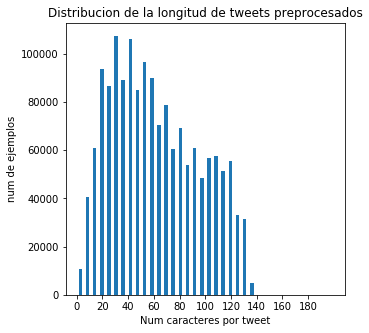

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.hist(df.LOGITUD_TEXTO_LIMPIO,36,rwidth=.5,range=(0, 200 ))

plt.xlabel('Num caracteres por tweet')
plt.ylabel('num de ejemplos')
plt.title("Distribucion de la longitud de tweets preprocesados")
plt.xticks(np.arange(0,200,20))
plt.show()

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


y = df.SENTIMIENTO

X_train, X_test, y_train, y_test = train_test_split(df.TEXTO_LIMPIO,y,test_size=0.33, random_state=100)


# Instanciar CountVectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Entrenar el countvectorizer y transformar la matriz de entrenamiento 
count_train = count_vectorizer.fit_transform(X_train)

# transformar la matriz de prueba
count_test = count_vectorizer.transform(X_test)

print(len(count_vectorizer.get_feature_names()))

194648


In [33]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

#  Entrenar el tfidfvectorizer y transformar la matriz de entrenamiento  
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# transformar la matriz de prueba 
tfidf_test = tfidf_vectorizer.transform(X_test)

/home/war-machine/anaconda3/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


## Naive Bayes

Presentacion Naive Bayes Machine Learning With Big Data from University of California San Diego <br>


In [34]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier_cont = MultinomialNB()
nb_classifier_tfidf = MultinomialNB()

# Fit the classifier to the training data
nb_classifier_cont.fit(count_train,y_train)
nb_classifier_tfidf.fit(tfidf_train,y_train)

# Create the predicted tags: pred
pred_NB_count = nb_classifier_cont.predict(count_test)
pred_NB_tfdidf = nb_classifier_tfidf.predict(tfidf_test)

# Calculate the accuracy score: score
score_NB_count = metrics.accuracy_score(y_test,pred_NB_count)
score_NB_tfdidf = metrics.accuracy_score(y_test,pred_NB_tfdidf)

print(score_NB_count)
print(score_NB_tfdidf)

0.7671742424242424
0.7611344696969697


### Encontremos un adecuado hiperparametro

In [36]:
def train_and_predict(xtrain,ytrain,xtest,ytest,alpha):
    
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(xtrain,ytrain)
    pred = nb_classifier.predict(xtest)
    score = metrics.accuracy_score(ytest,pred)
    return score

In [37]:
for alfa in np.arange(0.1,1,step=0.1):
    print('Alfa: ', alfa)
    print('Score: ', train_and_predict(count_train,y_train,count_test,y_test,alfa))
    print()

Alfa:  0.1
Score:  0.7617632575757576

Alfa:  0.2
Score:  0.7632954545454546

Alfa:  0.30000000000000004
Score:  0.7643636363636364

Alfa:  0.4
Score:  0.7651174242424242

Alfa:  0.5
Score:  0.7656969696969697

Alfa:  0.6
Score:  0.7660606060606061

Alfa:  0.7000000000000001
Score:  0.7664090909090909

Alfa:  0.8
Score:  0.7667613636363636

Alfa:  0.9
Score:  0.7669507575757576



In [38]:
for alfa in np.arange(0.1,1,step=0.1):
    print('Alfa: ', alfa)
    print('Score: ', train_and_predict(tfidf_train,y_train,tfidf_test,y_test,alfa))
    print()

Alfa:  0.1
Score:  0.7530170454545455

Alfa:  0.2
Score:  0.7550852272727273

Alfa:  0.30000000000000004
Score:  0.7564280303030303

Alfa:  0.4
Score:  0.7575776515151516

Alfa:  0.5
Score:  0.7585435606060607

Alfa:  0.6
Score:  0.7591837121212122

Alfa:  0.7000000000000001
Score:  0.7597784090909091

Alfa:  0.8
Score:  0.7603200757575758

Alfa:  0.9
Score:  0.760810606060606



### Probemos

In [101]:
#Menciones
regex1=r'@\w+'

#Quitemos las paginas web
regex2=r'https?://[\w./]+|www.[\S]+'

#Letras unicamente
regex3=r"[^a-z]"

docsclean2=[]
lendocsclean2=[]

for i in tweets:


    text1 = BeautifulSoup(i, 'lxml')
    text2 = text1.get_text().lower()
    text3 = re.sub(regex1,' ',text2)
    text4 = re.sub(regex2,' ',text3)
    text5 = re.sub(regex3,' ',text4)
    text6 = re.sub(r"(.)\1{2,}",r'\1\1', text5)
    lista6 = text6.split()
    text7 = ' '.join(lista6)

    docsclean2.append(text7)
    lendocsclean2.append(len(text7))

In [95]:
count_test2 = count_vectorizer.transform(docsclean2)

In [103]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import numpy as np

pred_NB_count = nb_classifier_cont.predict(count_test2)



In [39]:
# 0 negativo, 4 positivo
for j,k in zip(tweets[:20],pred_NB_count[:20]):
    print("--------------------")
    print(j)
    print(k)
    print("--------------------\n")

NameError: name 'tweets' is not defined